<img src="https://drive.google.com/uc?id=1zDNI5DqbrfvgrgEraXgvIv0A8WZxT-g1"/>


# Computer vision assigment



Hi, 

This is an off-site asynchronous computer vision test to join the PhotoRoom team.

## Context 
You're in the process of joining the PhotoRoom team, this test will help us to know more about the way you work and you communicate. Machine learning powers the core of our product and we are always working to improve it. 

There's no trap: the goal is for us to know better your work habits, the way you arbitrage, communicate and code. We'd like to avoid taking too much of your time, **please don't spend more than 3 hours** on the test. We can accept an unfinished project, as long as it displays quality and it's well explained. This is an open ended exercise allowing you to showcase areas of machine learning where you excel.

## Exercise 
You will train a model for facial keypoint detection. For the purpose of this exercise, we'd like you to train a convolutional network on this dataset. While you are free to take the object detection route, we recommend to treat this as an image to image translation problem, where you predict heatmaps of the keypoints.

<img src="https://drive.google.com/uc?id=1u6wC_x3hOwG6rlcpFOJqjcIYzzNtmFDV"/>


We provide a small dataset of images and labels. We detail below the outline of the viable training code we'd like you to achieve. If time allows we encourage you to work further on one of the areas. Choose one which you feel can showcase your ML talent best. Afterwards we will discuss with you which choices you made and encourage you to explain why. 

## Required Features

1. Dataloader for images and labels 
2. Convolutional neural network to predict label from image 
3. Loss function to compute prediction error
4. Training loop to train model
5. Validation loop to evaluate model
6. Visualisation of results and brief commentary on model accuracy.

All choices within those are down to you. We **don't expect incredible model performance**, but we do want a running model. We are fully aware of the time, hardware and dataset constraints. We are not evaluating raw accuracy.


## Suggestions for optional improvements

Network accuracy, speed, memory or the training code. E.g: extra data augmentation, hyperparameter search, network architecture, losses, logging.


## Rules

- For the purposes of this test, we'll only communicate in English and over emails
- You can use any library, framework or model
- You can check for help on the internet (like StackOverflow), no shame here
    - **You must give references to the source code.**
- You must ask us if you encounter any blocker, or if you're not sure to understand perfectly what we're expecting from you
- At the end of the exercise, send a link to a public Github repository (or private if you prefer, in which case invite Eliot [[EliotAndres](github.com/eliotandres/)])
- **All of the code** necessary to complete the assignment **must be included in this colab notebook.** While we understand that having separate python files may sometimes be cleaner than a notebook, this is to ensure that all candidates have access to at least one GPU. 
- After receiving the code and reviewing it, we'll schedule a 30 minutes call to discuss your work. 

# What's evaluated

- Understanding of what we're expecting
- Proficiency with machine learning techniques
- Technical choices and their underlying explanations
- Code readability/simplicity over performance


We will provide a sample code to load the dataset and extract both the images and the facial landmarks from the csv file. 



# Using The GPU
In order to use the GPU inside Colab, go to the Runtime tab and click on Change Runtime Type. Then select GPU from the dropdown menu.


# My Code

## Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Train/test splitting
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

#necessary Pytorch packages
from torch import Tensor
from torch.utils.data import DataLoader, TensorDataset
from torch.optim.lr_scheduler import StepLR
import torch.optim as optim
import torch
import torch.nn as nn
import torch.nn.functional as F

import torchvision
import torchvision.models as models 
from torchvision import datasets

#drive
import os
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)
os.chdir('/content/drive/MyDrive/MVA/Internship/PHOTOROOM/data')

Mounted at /content/drive/


In [2]:
!pip install gdown
!gdown https://drive.google.com/uc?id=162YTEfBHItdy5UwqwqeXf5whXRQDcb1Q

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=162YTEfBHItdy5UwqwqeXf5whXRQDcb1Q 



## Dataset vizualization 

In [3]:
df_train = pd.read_csv('training.csv')
print(f"DataFrame Shape {df_train.shape}")
df_train.head(3)

DataFrame Shape (7049, 31)


,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

>From the dataset info we have for each image 15 points (30 cordinates in total to predict and train on) for different sections of the face. In the following parts we are going to extract the data from the cvs file then preprocess the elements and split into train and validation set. Next build a model and process the training and validation.





### Retrieve data :

In [5]:
feature_col = 'Image'
target_cols = list(df_train.drop('Image', axis=1).columns)

# Fill missing values
df_train[target_cols] = df_train[target_cols].fillna(df_train[target_cols].mean())

# Image characteristics
IMG_WIDTH  = 96
IMG_HEIGHT = 96
IMG_CHANNELS = 1

raw_images = np.array(df_train[feature_col].str.split().tolist(), dtype='float')
images = raw_images.reshape(-1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)/255.0

labels = df_train[target_cols].values

#total data 
print("Total data examples:", len(images))
print('Number of features', labels.shape)

Total data examples: 7049
Number of features (7049, 30)


Function for image and point display 

In [6]:
def show_examples(images, landmarks):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 5))
    
    for img, marks, ax in zip(images, landmarks, axes.ravel()):
        # Keypoints
        x_points = marks[:: 2]
        y_points = marks[1::2]
        
        ax.imshow(img.squeeze(), cmap='gray')
        ax.scatter(x_points, y_points, s=10, color='red')
    
    plt.show()

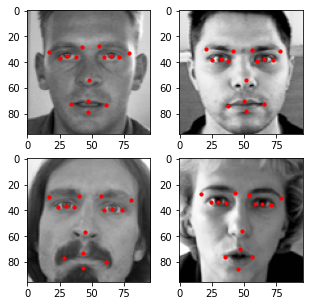

In [7]:
#show 4 pictures with marks 
idx = np.random.choice(4, 4)
show_examples(images[idx], labels[idx])

## Dataloader

### Split and normalize data 



> In this section we are going to split the data into training and validation (70% 30%) then normalize the feature points. Normalization is an essential part of product information management, preventing data from being replicated in two tables at the same time or unrelated product data being gathered together in the same table. In addition, normalization helps to streamline your data, simplifying your database and making it more concise.



In [8]:
#Split data 
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size = 0.3, random_state=11)
print(train_labels.shape)
#normalize the labels
#scaler = StandardScaler()
#scaler.fit(train_labels)

#train_labels_norm = scaler.transform(train_labels)
#test_labels_norm  = scaler.transform(test_labels)

print('Shape of training set ', len(train_images))
print('Shape of test set ', len(test_images))

(4934, 30)
Shape of training set  4934
Shape of test set  2115


### Dataloaders



> In this section we are going to construct the dataloaders. Additionnally we can add data augmentation such as flipping the images and various rotations. Due to the time constraint we are going to skip this step 



In [9]:
#dataloaders
df_train = TensorDataset( Tensor(train_images), Tensor(train_labels) )
df_test= TensorDataset( Tensor(test_images), Tensor(test_labels) )

#loaders
train_loader = DataLoader(df_train, batch_size= 32)
val_loader = DataLoader(df_test, batch_size=32 )

## CNN model



> In this section we are going to construct the neural network model. I used transfer learning. Basically, transfer learning is the reuse of a pre-trained model on a new problem. It's currently very popular in deep learning because it can train deep neural networks with comparatively little data. For this task, I used a resnet50. ResNet-50 is a convolutional neural network that is 50 layers deep. We load a pretrained version of the network trained on more than a million images from the ImageNet database. 


> We start with a convolutional layer while keeping in mind shapping the input in a manner that coordinates with the resnet input. After the pretrained resnet model we add dropout layers to ovoid overfitting and linear layers 






In [10]:
class Resnet50(nn.Module):
  """
  Class that uses ResNet50 and adds two FC layers and two Dropout layers.
  """
  
  def __init__(self):
    super(Resnet50, self).__init__()
    resnet = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    modules = list(resnet.children())[:-1]  # remove the last layer
    self.conv2=nn.Conv2d(96,3, kernel_size=(3,1))
    self.leakyrelu=nn.LeakyReLU()

    self.resnet = nn.Sequential(*modules)
    
    self.linear1 = nn.Linear(resnet.fc.in_features, 1024)
    self.linear2 = nn.Linear(2*1024, 30)
    self.dropout1 = nn.Dropout(p=0.8)
    self.dropout2 = nn.Dropout(p=0.5)
    
  def forward(self, x):
    x=self.leakyrelu(self.conv2(x))
    x = self.resnet(x)
    x = x.view(x.size(0), -1)

    x = self.dropout1(x)
    
    x = self.dropout2(x)
    x = self.linear2(x)

    return x

##Train and evaluate

### train and validation functions



> For the training and validation we use MSE loss. Mean squared error (MSE) loss is used in regression tasks where we are trying to minimize an expected value of some function on our training data.



In [11]:
from sklearn.metrics import accuracy_score, mean_absolute_error
def train(epoch, model , optimizer , log_interval):

    model.train()
    train_loss = 0
    correct = 0
    accuracy=list()
    for batch_idx, (data, target) in enumerate(train_loader):
        
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        
        optimizer.zero_grad()
        output = model(data)
        
        criterion = torch.nn.MSELoss(reduction='mean')
        loss = criterion(output, target)

        train_loss += loss.data.item()
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.data.item()))

    return train_loss /len(train_loader.dataset)

In [12]:
def validation(model, epoch):
  
    model.eval()

    validation_loss = 0
    correct = 0

    for data, target in val_loader:
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        output = model(data)
        
        # sum up batch loss
        criterion = torch.nn.MSELoss(reduction='mean')
        validation_loss += criterion(output, target).data.item()

        

    validation_loss /= len(val_loader.dataset)
    
    print('\nValidation set: Average loss: {:.4f}, '.format(
        validation_loss))
    
    return validation_loss 

### Train and validation  loop

In [13]:
# Lists to store performances 
val_loss_list= []
train_loss_list = []
num_epochs=30
# Hyperparameters after parameter tuning
hyperparam = {'lr':1e-4, 'w_decay':1e-5, 'step_size' : 20 , 'gamma' : 0.1} 

# Define the model
model =Resnet50() ### The best model 
use_cuda = torch.cuda.is_available()
if torch.cuda.is_available():
  model.cuda()

optimizer = optim.Adam(params=model.parameters(), lr=hyperparam['lr'], weight_decay=hyperparam['w_decay'])
scheduler = StepLR(optimizer, step_size=hyperparam['step_size'], gamma=hyperparam['gamma'])  


for epoch in range(1, num_epochs + 1):

    train_loss  = train(epoch, model , optimizer, 10)
    val_loss  = validation(model, epoch)
    
    val_loss_list.append(val_loss)
    train_loss_list.append(train_loss)

    scheduler.step()

Train Epoch: 1 [0/4934 (0%)]	Loss: 2614.897461
Train Epoch: 1 [320/4934 (6%)]	Loss: 2647.456787
Train Epoch: 1 [640/4934 (13%)]	Loss: 2565.458008
Train Epoch: 1 [960/4934 (19%)]	Loss: 2582.513184
Train Epoch: 1 [1280/4934 (26%)]	Loss: 2565.438965
Train Epoch: 1 [1600/4934 (32%)]	Loss: 2546.146973
Train Epoch: 1 [1920/4934 (39%)]	Loss: 2492.400146
Train Epoch: 1 [2240/4934 (45%)]	Loss: 2504.194824
Train Epoch: 1 [2560/4934 (52%)]	Loss: 2463.238770
Train Epoch: 1 [2880/4934 (58%)]	Loss: 2389.627686
Train Epoch: 1 [3200/4934 (65%)]	Loss: 2359.643799
Train Epoch: 1 [3520/4934 (71%)]	Loss: 2332.937988
Train Epoch: 1 [3840/4934 (77%)]	Loss: 2238.810303
Train Epoch: 1 [4160/4934 (84%)]	Loss: 2207.822998
Train Epoch: 1 [4480/4934 (90%)]	Loss: 2132.885742
Train Epoch: 1 [4800/4934 (97%)]	Loss: 1995.844727

Validation set: Average loss: 60.4992, 
Train Epoch: 2 [0/4934 (0%)]	Loss: 1989.416748
Train Epoch: 2 [320/4934 (6%)]	Loss: 2040.261230
Train Epoch: 2 [640/4934 (13%)]	Loss: 1788.520264
Train

### Performance display 

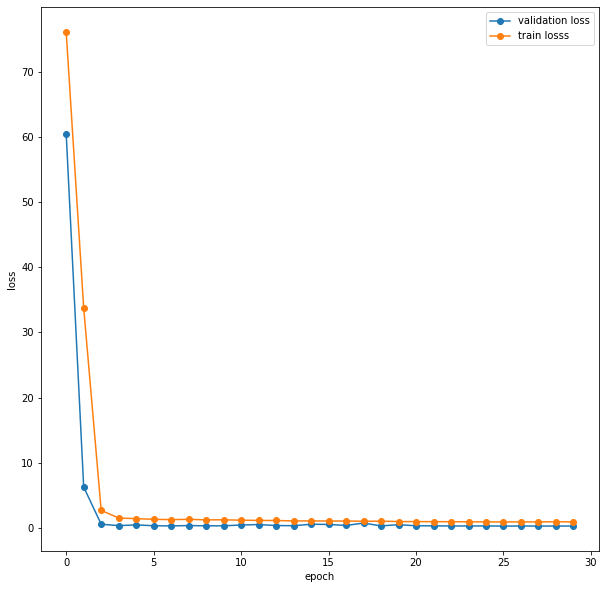

In [14]:
plt.figure(figsize=(10,10))
plt.plot(val_loss_list,'-o',label='validation loss')
plt.plot(train_loss_list,'-o',label='train losss')

plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend()

### Display examples 

In [15]:
def image_show(image,marks,preds):
    image=image.numpy()
    marks=marks.detach().numpy().reshape(1, -1)
    
   
    preds=preds.detach().numpy()
    preds=preds.reshape(1, -1)
    x_points = marks[0][:: 2]
   
    y_points = marks[0][1::2]
    x_pred = preds[0][:: 2]
    y_pred = preds[0][1::2]
    plt.imshow(image.squeeze(), cmap='gray')
    plt.scatter(x_points, y_points, s=10, color='red')
    plt.scatter(x_pred, y_pred, s=10, color='green')
    
    plt.show()

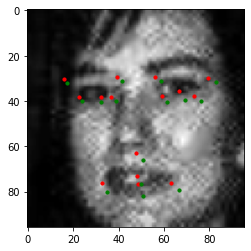

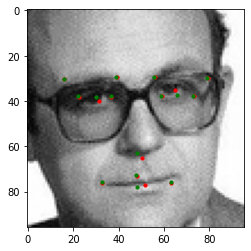

In [18]:

# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

images, labels= images.cuda(), labels.cuda()
pred=model(images).cpu()
images, labels= images.cpu(), labels.cpu()

# show images
plt.figure(figsize=(4,4))
image_show(images[9],labels[9],pred[9])

image_show(images[1],labels[1],pred[1])